<a href="https://colab.research.google.com/github/Kadakol/ML/blob/master/VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir /root/.kaggle
!echo '{"username":"akshaykadakol","key":"383f2d269ce7374e747a0cd8b237b390"}' > /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d tongpython/cat-and-dog
!ls
!unzip cat-and-dog.zip -d cat-and-dog
!ls -ltra cat-and-dog

 97% 212M/218M [00:02<00:00, 94.8MB/s]
100% 218M/218M [00:02<00:00, 78.1MB/s]
cat-and-dog.zip  sample_data
Archive:  cat-and-dog.zip
  inflating: cat-and-dog/test_set/test_set/cats/_DS_Store  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4001.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4002.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4003.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4004.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4005.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4006.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4007.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4008.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4009.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4010.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4011.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4012.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="./cat-and-dog/training_set/training_set", target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="./cat-and-dog/test_set/test_set", target_size=(224,224))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [3]:
import collections

print(traindata.class_indices)
print(traindata.data_format)
print(traindata.image_shape)
print(traindata.target_size)
print(traindata.labels)
counter=collections.Counter(traindata.labels)
print(counter)
print(traindata.num_classes)
print(traindata.samples)
print(traindata.batch_index)
print(traindata.batch_size)
print(traindata.shuffle)

print()

print(testdata.class_indices)
print(testdata.data_format)
print(testdata.image_shape)
print(testdata.target_size)
print(testdata.labels)
counter=collections.Counter(testdata.labels)
print(counter)
print(testdata.num_classes)
print(testdata.samples)
print(testdata.batch_index)
print(testdata.batch_size)
print(testdata.shuffle)

{'cats': 0, 'dogs': 1}
channels_last
(224, 224, 3)
(224, 224)
[0 0 0 ... 1 1 1]
Counter({1: 4005, 0: 4000})
2
8005
0
32
True

{'cats': 0, 'dogs': 1}
channels_last
(224, 224, 3)
(224, 224)
[0 0 0 ... 1 1 1]
Counter({1: 1012, 0: 1011})
2
2023
0
32
True


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=64, input_shape=(224,224,3), kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Flatten())

model.add(Dense(4096, input_shape=(14*14*512,), activation='relu'))
model.add(Dense(4096, activation='relu'))

model.add(Dense(2, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [0]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
hist = model.fit_generator(steps_per_epoch=10, generator=traindata, validation_data=testdata, validation_steps=10, epochs=100, callbacks=[checkpoint])

Epoch 1/100
10/10 [==============================] - 1s 129ms/step - loss: 0.6851 - acc: 0.5688

Epoch 00001: val_acc improved from -inf to 0.56875, saving model to vgg16.h5
10/10 [==============================] - 23s 2s/step - loss: 0.7006 - acc: 0.5188 - val_loss: 0.6851 - val_acc: 0.5688
Epoch 2/100
10/10 [==============================] - 1s 132ms/step - loss: 0.6831 - acc: 0.5875

Epoch 00002: val_acc improved from 0.56875 to 0.58750, saving model to vgg16.h5
10/10 [==============================] - 42s 4s/step - loss: 0.6837 - acc: 0.5531 - val_loss: 0.6831 - val_acc: 0.5875
Epoch 3/100
10/10 [==============================] - 1s 138ms/step - loss: 0.6771 - acc: 0.6062

Epoch 00003: val_acc improved from 0.58750 to 0.60625, saving model to vgg16.h5
10/10 [==============================] - 40s 4s/step - loss: 0.6853 - acc: 0.5625 - val_loss: 0.6771 - val_acc: 0.6062
Epoch 4/100
10/10 [==============================] - 1s 114ms/step - loss: 0.6756 - acc: 0.5875

Epoch 00004: val_a

{'loss': [0.7006018280982971, 0.6836515069007874, 0.6852709114551544, 0.6743105590343476, 0.6761422038078309, 0.6686561644077301, 0.6658321976661682, 0.6724371016025543, 0.6651851236820221, 0.6653473079204559, 0.663247036933899, 0.6680318474769592, 0.6593564450740814, 0.6467394530773163, 0.6719366312026978, 0.6491346418857574, 0.6634561240673065, 0.6404590384952037, 0.6343022286891937, 0.6411655664443969, 0.6785504937171936, 0.6519465386867523, 0.6462546765804291, 0.6684439539909363, 0.6499492406845093, 0.6382912695407867, 0.648835825920105, 0.6385271608829498, 0.6233848333358765, 0.6387681497241857, 0.6151046693325043, 0.631412947177887, 0.6104077160358429, 0.6157518684864044, 0.6157547235488892, 0.6160828649997712, 0.6041729748249054, 0.615808641910553, 0.6288378059864044, 0.6250946044921875, 0.641294801235199, 0.6256084263324737, 0.6252851486206055, 0.6303273439407349, 0.6379238724708557, 0.6290553450584412, 0.6370130002498626, 0.6003819346427918, 0.6249362885951996, 0.6336498141288

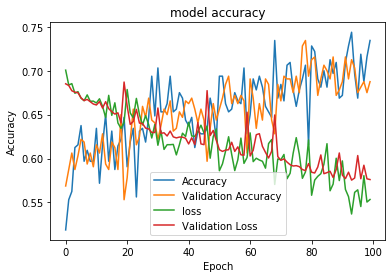

In [8]:
import matplotlib.pyplot as plt

print(hist.history)
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [9]:
!wget "https://www.guidedogs.org/wp-content/uploads/2019/11/website-donate-mobile.jpg"
!mv website-donate-mobile.jpg ./cat-and-dog/dog_test.png

--2020-01-06 05:53:44--  https://www.guidedogs.org/wp-content/uploads/2019/11/website-donate-mobile.jpg
Resolving www.guidedogs.org (www.guidedogs.org)... 192.138.21.222
Connecting to www.guidedogs.org (www.guidedogs.org)|192.138.21.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47539 (46K) [image/jpeg]
Saving to: ‘website-donate-mobile.jpg’

website-donate-mobi 100%[===================>]  46.42K  --.-KB/s    in 0.1s    

2020-01-06 05:53:44 (453 KB/s) - ‘website-donate-mobile.jpg’ saved [47539/47539]



[[0.42733315 0.5726669 ]]
dog


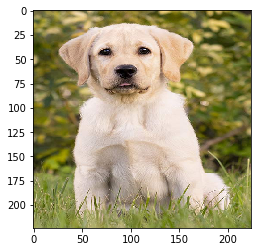

In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img("./cat-and-dog/dog_test.png",target_size=(224,224))
img = np.asarray(img, dtype=np.float32)
plt.imshow(img.astype(np.uint8))
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

In [11]:
from tensorflow.keras.models import load_model

saved_model = load_model("vgg16.h5")
output = saved_model.predict(img)
print(output)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[[0.37347442 0.6265256 ]]
dog
